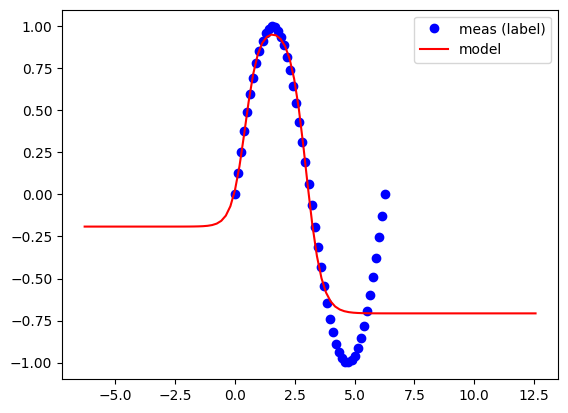

In [1]:
from gekko import brain
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0,2*np.pi)
y = np.sin(x)

b = brain.Brain(remote=False)
b.input_layer(1)
b.layer(linear=2)
b.layer(tanh=2)
b.layer(linear=2)
b.output_layer(1)
b.learn(x,y,disp=False)      

xp = np.linspace(-2*np.pi,4*np.pi,100)
yp = b.think(xp)  

plt.figure()
plt.plot(x,y,'bo',label='meas (label)')
plt.plot(xp,yp[0],'r-',label='model')
plt.legend(); plt.show()

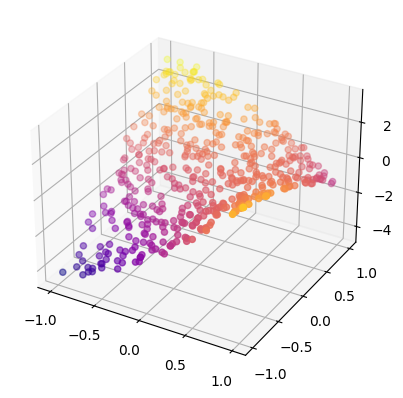

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

def f(x,y):
    return 2*math.cos(x)*y + x*math.cos(y) - 3*x*y

n = 500
x = (np.random.rand(n)-0.5)*2.0
y = (np.random.rand(n)-0.5)*2.0
z = np.empty_like(x)
for i in range(n):
    z[i] = f(x[i],y[i])
data = pd.DataFrame(np.vstack((x,y,z)).T,columns=['x','y','z'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=z,cmap='plasma')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
ds = pd.DataFrame(ds,columns=data.columns)

# no data scaling
ds = data

# data splitting into train and test sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)